In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import *
import numpy as np
import scqubits as scq
from matplotlib import pyplot as plt
from labellines import labelLines
import h5py
from hdf5Reader  import *

#0.5  605
#0 -1.26


In [2]:
def plot_transition_spectrum_data(fileDict,fluxonium,evals_count,point,zeroc,halfc,Phase=False):
    
    def current(c):
        phi=c*(0.5/(halfc-zeroc))-zeroc*(0.5/(halfc-zeroc))
        return phi
    
    #import data from labber(use VNA)
    fig, axes =plt.subplots()
    data =hdf5Handle('yo','uA',fileDict)
    data.slice()
    if Phase:
        output_exp = np.angle(data.z)
    else:
        output_exp = np.abs(data.z)
    extent =  current(min(data.y)/10**-6),current(max(data.y)/10**-6), data.x[0]/10**9, data.x[-1]/10**9
    plt.imshow(output_exp, origin="lower", aspect = "auto", cmap = "viridis", interpolation = "None", extent=extent)
    
    #solve eigen energy
    flux_list = np.linspace(current(min(data.y)/10**-6), current(max(data.y)/10**-6), point)
    eigval = fluxonium.get_spectrum_vs_paramvals("flux", flux_list, evals_count).energy_table
    eigval_list = eigval.T
    
    N = np.shape(eigval_list)[0]
    # probable transition:
    # 0-f, 1-f
    spectrum_list_0 = np.zeros((N-1, len(flux_list)))
    spectrum_list_1 = np.zeros((N-2, len(flux_list)))
    
    for i in range(N-1):
        spectrum_list_0[i] = eigval_list[i+1] - eigval_list[0]
    for i in range(N-2):
        spectrum_list_1[i] = eigval_list[i+2] - eigval_list[1]
 

    
    for idx in range(np.shape(spectrum_list_0)[0]):
        plt.plot(flux_list, spectrum_list_0[idx],"--",alpha=0.5,label=f"{idx+1},0") # 0-f
        #if idx !=0:
            #plt.plot(flux_list, spectrum_list_0[idx]/2,"--", alpha=0.5,label=f"{idx+1},0 2p")#Two photon0-f
    for idx in range(np.shape(spectrum_list_1)[0]):
        plt.plot(flux_list, spectrum_list_1[idx],"--", alpha=0.5,label=f"{idx+2},1")#1-f
        #plt.plot(flux_list, spectrum_list_1[idx]/2,"--" ,alpha=0.7,label=f"{idx+2},1 2p")#Two photon1-f
        
    plt.xlabel(r"$\frac{\phi_{ext}}{2\pi}$")
    plt.ylabel("Frequency(GHz)")
    plt.title("Transition spectrum", fontsize=16)
    plt.xlim([ current(min(data.y)/10**-6),current(max(data.y)/10**-6)])
    plt.ylim([data.x[0]/10**9,data.x[-1]/10**9])
    labelLines(axes.get_lines(), zorder=1.5)
    
    fig, axes = fluxonium.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=[(0, 1),(0,2),(1,2)]);
    plt.xlim([ current(min(data.y)/10**-6),current(max(data.y)/10**-6)])
    plt.ylabel("Matrixelement", fontsize=16)
    labelLines(axes.get_lines(), zorder=2.5)

Choose the log channel index from below:
0: VNA - S21_deembed
1: VNA - S21
=>0


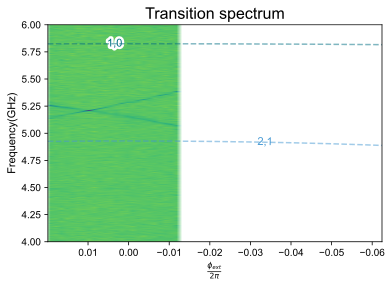

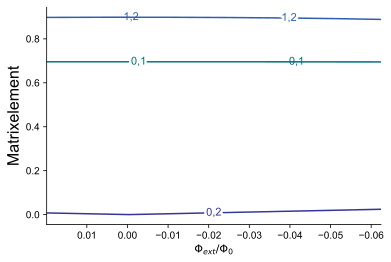

In [6]:
# %matplotlib notebook
fluxonium = scq.Fluxonium(
    EJ=6.25,
    EC=0.75,
    EL=0.91,
    cutoff = 30,
    flux = 0.5
)
#     EJ=6.305,
#     EC=0.77,
#     EL=0.94,
fileDict = r'C:\Users\user\Downloads\1.hdf5'#input file path(only for VNA)
evals_count=4
plot_transition_spectrum_data(fileDict,fluxonium,evals_count,301,-491,-1220,Phase=False) #(file path,fluxonium,evals_count,flux resolution,half quanta current(uA),integer quanta)

In [24]:
halfc=-491
zeroc=-1220
def current(c):
    phi=c*(0.5/(halfc-zeroc))-zeroc*(0.5/(halfc-zeroc))
    return phi

In [122]:
current(-645.1)

0.3943072702331961

Choose the log channel index from below:
0: VNA - S21_deembed
1: VNA - S21
=>0


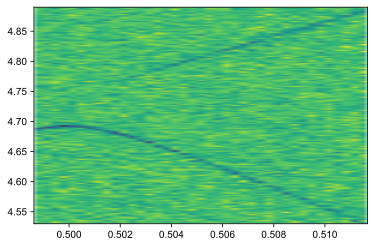

In [5]:
#import data from labber(use VNA)
fileDict = r'C:\Users\user\Downloads\3.hdf5'
fig, axes =plt.subplots()
data =hdf5Handle('yo','uA',fileDict)
data.slice()
output_exp = np.abs(data.z)
extent =  current(min(data.y)/10**-6),current(max(data.y)/10**-6), data.x[0]/10**9, data.x[-1]/10**9
plt.imshow(output_exp, origin="lower", aspect = "auto", cmap = "viridis", interpolation = "None", extent=extent)